<div style="border:solid Chocolate 2px; padding: 40px">
 
<b> Владимир, привет!👋</b>  

Меня зовут Кирилл Васильев, я буду ревьюером твоего проекта. Я предлагаю общаться на «ты», но если привычнее на «вы», просто скажи об этом! 

Я буду оставлять комментарии в твоем проекте. Пожалуйста, не удаляй их, они могут быть полезны в случае повторной проверки.

Ты можешь реагировать на комментарии как просто написав их в Markdown-ячейках, так и выделив их цветом. Например, <font color='blue'>синим</font>. Второй способ, на мой взгляд, удобнее.

Свои комментарии я буду обозначать <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:
 
<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным. Здесь же я могу давать советы и предложения.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку! 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [2]:
!pip install scikit-learn==1.1.3

     |████████████████████████████████| 30.8 MB 49 kB/s  eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, roc_curve, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
Если загружаем несколько функций из одного пакета, то удобнее записать это через запятую.
    
`from sklearn.metrics import f1_score, roc_auc_score`
    

</div>


<div class="alert alert-info">
<b> Комментарий студента</b>

исправил, спасибо)
</div>

In [4]:
data = pd.read_csv('/datasets/Churn.csv')

display(data.info())
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
data = data.drop(['Surname', 'RowNumber', 'CustomerId'], axis=1)
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median())
data_ohe = pd.get_dummies(data, drop_first=True)
display(data_ohe.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Предположение, что пропуски там, где клиент пришел недавно достаточно неплохое. Но подтвердить его сейчас мы не можем. Поэтому лучше следовать принципу, что следующие данные будут такими же по распределению, как текущие, и лучшей тактикой минимизации ошибки будет значение из области наибольшей плотности распределения, не изменяющую структуры распределения признака. 
    
Доля пропусков не критично велика, возможно и решение с удалением. Однако данных у нас не много, я бы остановился на чем-то вроде медианы.

</div>

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Отлично, что удалили фамилию, но у нас еще остались два столбца, где данные уникальные и для модели они не годятся (айдишник и номер строки)

</div>

<div class="alert alert-info">
<b> Комментарий студента</b>

удалил лишние столбцы и заменил пропуски на медианное значение в столбце "Tenure"
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

👍 Теперь все отлично.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Согласен. В дамми-ловушку не попались.
</div>



<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

В тренажере давался пример использования прямого кодирования с помощью get_dummies, однако это далеко не самый оптимальный вариант. Он подходит для анализа данных, но в машинном обучении может служить причиной ошибок при обучении моделей.
    
Можно использовать класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html">OHE из sklearn</a>. Он точно понадобится в будущих проектах, можно потренироваться сейчас. 

Практикум подготовил инструкцию, как использовать OHE: https://colab.research.google.com/drive/1_gAMXcQKoCShB_l8FNtYEejMnosm9mvt?usp=sharing 

А теперь замечания «под звездочкой»:

Есть загвоздка, что нам нужно будет одновременно использовать параметры drop='first' и handle_unknown='ignore’.  в OHE, а на платформе такое сочетание может выдавать ошибку (в части случаев). Если ошибка появляется, необходимо загрузить нужную версию сайкит-лерна. Для этого:

1. В отдельной строке в самом начале проекта запускаем такую команду:
 `!pip install scikit-learn==1.1.3`
     
2. Находим в меню юпитера кнопку `Kernel`, нажимаем и выбираем Restart&Run all 


И сразу уточню, что OHE мы используем уже после разделения выборок на обучающую, валидационную и тестовую. Обучаем на трейне, применяем ко всем. Кодируем после разбиения по аналогии с масштабированием. Посмотреть поподробнее также можно здесь <a href="https://stackoverflow.com/questions/55525195/do-i-have-to-do-one-hot-encoding-separately-for-train-and-test-dataset">можно здесь</a> .
      
</div> 



<div class="alert alert-info">
<b> Комментарий студента</b>

Спасибо, принял к сведению. Но пока не разобрался с тем что написано в статье, поизучаю и надеюсь что далее будет тема в теории практикума.
    
Можно еще подробнее объяснить, нам же нужно перевести в цифры столбец gender по всем выборкам, почему нельзя сперва сделать OHE, а уже потом сделать разбивку на выборки, так вроде проще) Чтобы потом не делать OHE несколько раз, или я что то не понимаю?)
    
что то понял, начал делать, но не меняет результат(столбец gender не изменился) в выборке по данному коду:

`train, valid = train_test_split(data, test_size=0.4, random_state=12345)`
    
    
`valid, test = train_test_split(valid, test_size=0.5, random_state=12345)`

    
`ohe = OneHotEncoder(handle_unknown = 'ignore')`

    
`ohe.fit(train)`
    

`ohe.transform(train).toarray()`
    
    
`ohe.transform(valid).toarray()`
    
    
`ohe.transform(test).toarray()`
    


`features_train = train.drop('Exited', axis=1)`
    
    
`target_train = train['Exited']`
    
    
`features_valid = valid.drop('Exited', axis=1)`
    
    
`target_valid = valid['Exited']`
    
    
`features_test = test.drop('Exited', axis=1)`
    
    
`target_test = test['Exited']`
    
Оставлю код как был пока, надеюсь на твою помощь)

</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера  #2 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Ок. По коду - нужно не забыть drop='first' добавить. Также нужно применять кодирование только к нужным столбцам. И также стоит использовать как по ссылке encoder_ohe.get_feature_names_out() - без них колонки окажутся безымянными. 
    
***
    
    
По тому, в каком порядке делаем кодирование и почему так.
    
Если используем get_dummies(), то делаем экнодинг до разбиения на выборки. Дело в том, что модели у нас считаются как матрицы, и необходимо, чтобы во всех выборках было одинаковое количество столбцов (и сами столбцы шли в одинаковом порядке и значили одинаковые вещи). Если будем кодировать выборки, то в некоторые могут попасть один страны, в другие - другие. И может оказаться, что у нас разные колонки или вообще разное их количество. Тогда код работать не будет.
    
Однако это не совсем удобно, когда модель работает в реальной жизни со свежими данными и вдруг появляется новая категория. Например, банк открыл отделение в Нидерландах, и теперь у нас и такая страна тоже в данных. Вот OHE от sclearn умеет упаковывать категории так, чтобы при неизвестных новых данных ничего не падало. В реальности каждый раз делать энкодинг и с нуля обучать модели будет накладно, поэтому будем лишь подготавливать новые данные заранее обученным энкодером и подавать в модель для предсказания.
       
</div>




In [6]:
# train, valid = train_test_split(data, test_size=0.4, random_state=12345)
# valid, test = train_test_split(valid, test_size=0.5, random_state=12345)

# ohe = OneHotEncoder(handle_unknown = 'ignore')
# ohe.fit(train)

# ohe.transform(train).toarray()
# ohe.transform(valid).toarray()
# ohe.transform(test).toarray()


#features_train = train.drop('Exited', axis=1)
# target_train = train['Exited']
# features_valid = valid.drop('Exited', axis=1)
# target_valid = valid['Exited']
# features_test = test.drop('Exited', axis=1)
# target_test = test['Exited']

features = data_ohe.drop('Exited', axis=1)
target = data_ohe['Exited']
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.4, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5, random_state=12345)



In [7]:
#код ревьюера
print(features_train.shape[0])
print(features_valid.shape[0])
print(features_test.shape[0])

6000
2000
2000


In [8]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

display(features_train.head())
display(features_valid.head())
display(features_test.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,-0.886751,-0.373192,1.082277,1.232271,-0.891560,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,1.082277,0.600563,-0.891560,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,-0.737696,1.027098,0.830152,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,0.354288,-1.233163,0.830152,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,-1.101690,1.140475,-0.891560,0,0,1.524268,1,0,0


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8532,-0.699824,-0.373192,-1.101690,-1.233163,0.830152,1,0,-0.015173,0,0,0
5799,-0.284431,0.575842,-0.737696,-1.233163,-0.891560,1,1,1.471724,0,0,0
5511,0.151731,-0.657902,-1.829679,0.438711,-0.891560,1,0,-1.367107,1,0,1
7365,-0.876366,-0.278288,1.810266,1.239884,-0.891560,1,1,-0.786517,0,1,0
7367,-0.481743,0.291132,1.810266,-1.233163,0.830152,1,0,1.358533,0,1,1


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7041,-2.226392,-0.088482,-1.101690,-1.233163,0.830152,1,0,0.647083,0,0,1
5709,-0.087120,0.006422,1.446272,-1.233163,-0.891560,1,0,-1.658410,0,0,0
7117,-0.917905,-0.752805,-0.009707,0.722307,-0.891560,1,1,-1.369334,0,1,1
7775,-0.253277,0.101325,1.810266,-1.233163,0.830152,1,0,0.075086,0,1,1
8735,0.785204,-0.847708,1.810266,0.615625,-0.891560,0,1,-1.070919,0,0,1


<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Здесь неоптимально разделили на выборки. На валидационную и тестовую лучше оставить поровну строк. Например, разделив в пропорциях 6:2:2

</div>

<div class="alert alert-info">
<b> Комментарий студента</b>

Здесь сглупил)
Потерялся в долях, исправил)
</div>

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Если используем регрессию, необходимо сделать масштабирование (после разделения на выборки - обучаем на тренировочной, применяем по всем трем, включая тестовую).

</div>

<div class="alert alert-info">
<b> Комментарий студента</b>

Добавил масштабирование
</div>

Загрузил данные и вложил в переменную "data", после чего изучил данные. Посчитал, что столбцы 'Surname', 'RowNumber', 'CustomerId' не влияют на результат предсказаний, но могут помешать обучению модели, потому удалил. Пропуски в столбце 'Tenure' заменил медианным значением. Методом OHE преобразовал столбцы 'Geography' и 'Gender' в количественные. Далее выделил признаки и целевой признак, разделил данные на обучающую, валидационную и тестовую выборки и масштабировал признаки.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Есть промежуточный вывод по предобработке. 
</div>


## Исследование задачи

In [9]:
model = LogisticRegression()
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
display(accuracy_score(target_valid, predictions_valid))

predictions_constant = pd.Series([0]*len(target_valid))
display(accuracy_score(target_valid, predictions_constant))

display(target_train[target_train == 0].count())
display(target_train[target_train == 1].count())

0.802

0.791

4804

1196

Создал модель логистической регрессии и проверил качество модели - 80%, хороший результат. Решил сравнить качество модели с константной моделью, результат тот же. Проверил сбалансированность классов обучающей выборки и оказалось, что присутствует дисбаланс классов, отрицательных больше чем положительных. 


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Дисбаланс исследовали. Да, он достаточно сильный, чтобы негативно повлиять на качество моделей.
    
Да, константная модель, что логично, выдает accuracy равным дисбалансу классов.
</div>


<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Здесь крайне важно для чистоты эксперимента и корректности сравнения унифицировать работу с моделями. Предлагаю такой план:
    
Выбрали модели: регрессия, дерево, лес. Посмотрели на них на всех без дисбаланса, подобрали гиперпараметры, прокомментировали лучшую модель.
    
Дальше тот же порядок действий, только при борьбе с дисбалансом: сделали апсемплинг, посмотрели с ним наши модели, выбрали лучшую, прокомментировали, обязательно с гиперпараметрами (нужно для воспроизводимости модели).
    
Все эти действия необходимо со всеми моделями проделать для апсемплинга, даунсемплинга и взвешеных классов (или что выберем).
    
Везде измеряем ROC-AUC.


</div>



In [10]:
#Решающее дерево
best_model = None
best_result = 0
for depth in range(1, 20, 1):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    if result > best_result:
        best_model = model
        best_result = result
probabilities_valid = model.predict_proba(features_valid)
print('f1-мера лучшей модели "Решающее дерево":', best_result)
print('Лучшая модель:', best_model)
print('Площадь под ROC-кривой:', roc_auc_score(target_valid, probabilities_valid[:, 1]))

f1-мера лучшей модели "Решающее дерево": 0.5696969696969697
Лучшая модель: DecisionTreeClassifier(max_depth=6, random_state=12345)
Площадь под ROC-кривой: 0.6840857675161356


In [11]:
#Случайный лес
best_model = None
best_result = 0
for est in range(1, 100, 1):
    for depth in range(1, 20,1):
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_forest.fit(features_train, target_train)
        predictions_forest = model_forest.predict(features_valid)
        result = f1_score(target_valid, predictions_forest)
        if result > best_result:
            best_model = model_forest
            best_result = result
probabilities_valid = model_forest.predict_proba(features_valid)           
print('f1-мера лучшей модели "Случайный лес":', best_result)
print('Лучшая модель:', best_model)
print('Площадь под ROC-кривой:', roc_auc_score(target_valid, probabilities_valid[:, 1]))

f1-мера лучшей модели "Случайный лес": 0.5999999999999999
Лучшая модель: RandomForestClassifier(max_depth=14, n_estimators=9, random_state=12345)
Площадь под ROC-кривой: 0.8363156987400117


In [22]:
#Логистическая регрессия
best_model_reg = None
best_result_reg = 0
for itr in range(100, 1000):
    for sol in ['lbfgs', 'liblinear']:
        model_reg = LogisticRegression(random_state=12345, solver=sol, max_iter=itr)
        model_reg.fit(features_train, target_train)
        predictions_reg = model_reg.predict(features_valid)
        result_reg = f1_score(target_valid, predictions_reg)
        if result_reg > best_result_reg:
            best_model_reg = model_reg
            best_result_reg = result_reg
probabilities_valid = model_reg.predict_proba(features_valid)       
print('f1-мера лучшей модели "Логистическая регрессия":', best_result_reg)
print('Лучшая модель:', best_model_reg)
print('Площадь под ROC-кривой:', roc_auc_score(target_valid, probabilities_valid[:, 1]))

f1-мера лучшей модели "Логистическая регрессия": 0.33108108108108103
Лучшая модель: LogisticRegression(random_state=12345)
Площадь под ROC-кривой: 0.7587512627102753


Провел измерение f1-меры и AUC-ROC разных моделей без учета дисбаланса с различными гиперпараметрами. На данном этапе лучший результат показала модель: `RandomForestClassifier(max_depth=14, n_estimators=9, random_state=12345)` со значением f1-меры 0.599

## Борьба с дисбалансом

In [13]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat) 
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
display(features_upsampled.shape)
display(target_upsampled.shape)
display(target_upsampled[target_upsampled == 0].count())
display(target_upsampled[target_upsampled == 1].count())

(9588, 11)

(9588,)

4804

4784

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Отлично, что используешь рукописную функцию, но здесь можно все оптимизировать, используя <a href="https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html">SMOTE</a> для увеличения выборки и <a href="https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html">RandomUnderSampler</a>  для уменьшения. 
    
Апсемплинг делается очень просто:
    
`oversample = SMOTE(random_state=RANDOM_STATE)`

`features_train_up, target_train_up = oversample.fit_resample(features_train_enc, target_train)`
    
*предварительно импотрировав `from imblearn.over_sampling import SMOTE`

**Чтобы импортировать imblearn его сначала требуется проинсталлировать. через `!pip install imblearn`
    
</div>


При помощи функции "upsample" исправил дисбаланс классов, далее проверим как обучится модель с обработанными выборками.

In [14]:
#Решающее дерево
best_model = None
best_result = 0
for depth in range(1, 20, 1):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_upsampled, target_upsampled)
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    if result > best_result:
        best_model = model
        best_result = result
probabilities_valid = model.predict_proba(features_valid)       
print('f1-мера лучшей модели "Решающее дерево":', best_result)
print('Лучшая модель:', best_model)
print('Площадь под ROC-кривой:', roc_auc_score(target_valid, probabilities_valid[:, 1]))


f1-мера лучшей модели "Решающее дерево": 0.5963791267305644
Лучшая модель: DecisionTreeClassifier(max_depth=5, random_state=12345)
Площадь под ROC-кривой: 0.6760203001469886


In [15]:
#Случайный лес
best_model = None
best_result = 0
for est in range(1, 100, 1):
    for depth in range(1, 20, 1):
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_forest.fit(features_upsampled, target_upsampled)
        predictions_forest = model_forest.predict(features_valid)
        result = f1_score(target_valid, predictions_forest)
        if result > best_result:
            best_model = model_forest
            best_result = result
probabilities_valid = model_forest.predict_proba(features_valid)
print('f1-мера лучшей модели "Случайный лес":', best_result)
print('Лучшая модель:', best_model)
print('Площадь под ROC-кривой:', roc_auc_score(target_valid, probabilities_valid[:, 1]))



f1-мера лучшей модели "Случайный лес": 0.6312433581296492
Лучшая модель: RandomForestClassifier(max_depth=9, n_estimators=67, random_state=12345)
Площадь под ROC-кривой: 0.8419706748770559


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

А здесь если мы подбираем сначала один гиперпараметр, а затем другой, то мы пропускаем несколько потенциально оптимальных комбинаций. Чуть дольше будет считаться, но зато лучший результат получим, если будем применять подбор гиперпараметров в двойном цикле:
    
`for est in range(10, 51, 10):
    for depth in range(1, 6):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)`
       
</div>


In [23]:
#Логистическая регрессия
best_model_reg = None
best_result_reg = 0
for itr in range(100, 1000):
    for sol in ['lbfgs', 'liblinear']:
        model_reg = LogisticRegression(random_state=12345, solver=sol, max_iter=itr)
        model_reg.fit(features_upsampled, target_upsampled)
        predictions_reg = model_reg.predict(features_valid)
        result_reg = f1_score(target_valid, predictions_reg)
        if result_reg > best_result_reg:
            best_model_reg = model_reg
            best_result_reg = result_reg
probabilities_valid = model_reg.predict_proba(features_valid)
print('f1-мера лучшей модели "Логистическая регрессия":', best_result_reg)
print('Лучшая модель:', best_model_reg)
print('Площадь под ROC-кривой:', roc_auc_score(target_valid, probabilities_valid[:, 1]))

f1-мера лучшей модели "Логистическая регрессия": 0.4888507718696398
Лучшая модель: LogisticRegression(random_state=12345)
Площадь под ROC-кривой: 0.7636478565682107


При использовании техники upsampling лучший результат выдала модель "Случайный лес", значений f1-меры 0,63, а AUC-ROC 0,84.
Далее попробуем технику downsampling.

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Здесь для чистоты эксперимента следует обучить все модели со всеми способами борьбы с дисбалансом. Мы должны быть уверены, что посоветуем заказчику лучшую модель.

</div>


<div class="alert alert-info">
<b> Комментарий студента</b>

Добавил
</div>

In [17]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_sample = features_zeros.sample(frac=fraction, random_state=12345)
    target_sample = target_zeros.sample(frac=fraction, random_state=12345)
    features_downsampled = pd.concat([features_sample]+[features_ones])
    target_downsampled = pd.concat([target_sample]+[target_ones])
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)


Исправил дисбаланс классов при помощи функции downsample, проверим как обучится модель на новой обучающей выборке.

In [18]:
#Решающее дерево
best_model = None
best_result = 0
for depth in range(1, 20, 1):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_downsampled, target_downsampled)
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    if result > best_result:
        best_model = model
        best_result = result
probabilities_valid = model.predict_proba(features_valid)       
print('f1-мера лучшей модели "Решающее дерево":', best_result)
print('Лучшая модель:', best_model)
print('Площадь под ROC-кривой:', roc_auc_score(target_valid, probabilities_valid[:, 1]))


f1-мера лучшей модели "Решающее дерево": 0.5943204868154158
Лучшая модель: DecisionTreeClassifier(max_depth=5, random_state=12345)
Площадь под ROC-кривой: 0.6953632068909199


In [21]:
#Случайный лес
best_model = None
best_result = 0
for est in range(1, 100, 1):
    for depth in range(1, 20, 1):
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_forest.fit(features_downsampled, target_downsampled)
        predictions_forest = model_forest.predict(features_valid)
        result = f1_score(target_valid, predictions_forest)
        if result > best_result:
            best_model = model_forest
            best_result = result
probabilities_valid = model_forest.predict_proba(features_valid)
print('f1-мера лучшей модели "Случайный лес":', best_result)
print('Лучшая модель:', best_model)
print('Площадь под ROC-кривой:', roc_auc_score(target_valid, probabilities_valid[:, 1]))

f1-мера лучшей модели "Случайный лес": 0.6092184368737475
Лучшая модель: RandomForestClassifier(max_depth=4, n_estimators=10, random_state=12345)
Площадь под ROC-кривой: 0.8454775313182393


In [24]:
#Логистическая регрессия
best_model_reg = None
best_result_reg = 0
for itr in range(100, 1000):
    for sol in ['lbfgs', 'liblinear']:
        model_reg = LogisticRegression(random_state=12345, solver=sol, max_iter=itr)
        model_reg.fit(features_downsampled, target_downsampled)
        predictions_reg = model_reg.predict(features_valid)
        result_reg = f1_score(target_valid, predictions_reg)
        if result_reg > best_result_reg:
            best_model_reg = model_reg
            best_result_reg = result_reg
probabilities_valid = model_reg.predict_proba(features_valid)
print('f1-мера лучшей модели "Логистическая регрессия":', best_result_reg)
print('Лучшая модель:', best_model_reg)
print('Площадь под ROC-кривой:', roc_auc_score(target_valid, probabilities_valid[:, 1]))

f1-мера лучшей модели "Логистическая регрессия": 0.48406546080964685
Лучшая модель: LogisticRegression(random_state=12345)
Площадь под ROC-кривой: 0.7622883637089505


При использовании техники downsampling лучший результат выдала модель "Случайный лес", значений f1-меры 0,61, а AUC-ROC 0,85. Теперь посмотрим какой результат выдаст модель с применением параметра class_weight='balanced'.

In [27]:
#Решающее дерево
best_model = None
best_result = 0
for depth in range(1, 20, 1):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    if result > best_result:
        best_model = model
        best_result = result
probabilities_valid = model.predict_proba(features_valid)       
print('f1-мера лучшей модели "Решающее дерево":', best_result)
print('Лучшая модель:', best_model)
print('Площадь под ROC-кривой:', roc_auc_score(target_valid, probabilities_valid[:, 1]))

f1-мера лучшей модели "Решающее дерево": 0.5963791267305644
Лучшая модель: DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=12345)
Площадь под ROC-кривой: 0.671212171619717


In [28]:
#Случайный лес
best_model = None
best_result = 0
for est in range(1, 100, 1):
    for depth in range(1, 20, 1):
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced')
        model_forest.fit(features_train, target_train)
        predictions_forest = model_forest.predict(features_valid)
        result = f1_score(target_valid, predictions_forest)
        if result > best_result:
            best_model = model_forest
            best_result = result
probabilities_valid = model_forest.predict_proba(features_valid)
print('f1-мера лучшей модели "Случайный лес":', best_result)
print('Лучшая модель:', best_model)
print('Площадь под ROC-кривой:', roc_auc_score(target_valid, probabilities_valid[:, 1]))

f1-мера лучшей модели "Случайный лес": 0.631236442516269
Лучшая модель: RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=47,
                       random_state=12345)
Площадь под ROC-кривой: 0.8376154585982252


In [30]:
#Логистическая регрессия
best_model_reg = None
best_result_reg = 0
for itr in range(100, 1000):
    for sol in ['lbfgs', 'liblinear']:
        model_reg = LogisticRegression(random_state=12345, solver=sol, max_iter=itr, class_weight = 'balanced')
        model_reg.fit(features_train, target_train)
        predictions_reg = model_reg.predict(features_valid)
        result_reg = f1_score(target_valid, predictions_reg)
        if result_reg > best_result_reg:
            best_model_reg = model_reg
            best_result_reg = result_reg
probabilities_valid = model_reg.predict_proba(features_valid)
print('f1-мера лучшей модели "Логистическая регрессия":', best_result_reg)
print('Лучшая модель:', best_model_reg)
print('Площадь под ROC-кривой:', roc_auc_score(target_valid, probabilities_valid[:, 1]))

f1-мера лучшей модели "Логистическая регрессия": 0.4888507718696398
Лучшая модель: LogisticRegression(class_weight='balanced', random_state=12345)
Площадь под ROC-кривой: 0.7637310291013133


Обучил 3 разные модели с учетом дисбаланса классов тремя разными способами, рассчитал для каждой значение f1-меры с разными гиперпараметрами и, по итогу исследования выявил, что наилучшее значение f1-меры имеет модель "Случайный лес", обученная по увеличенной выборке. Значение f1-меры - 0,63124, а AUC-ROC - 0,84197, при гиперпараметрах max_depth=9, n_estimators=67.
Проведем тестирование модели с полученными параметрами на тестовой выборке.

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Здесь нужно дополнить промежуточный комментарий качеством и гиперпараметрами лучшей модели − той, которую возьмем на тестирование. Если это не модель с лучшим значением F1, то можно пояснить, почему выбрали ее (например, скорость обучения высокая).

</div>


<div class="alert alert-info">
<b> Комментарий студента</b>

Дополнил вывод
</div>

## Тестирование модели

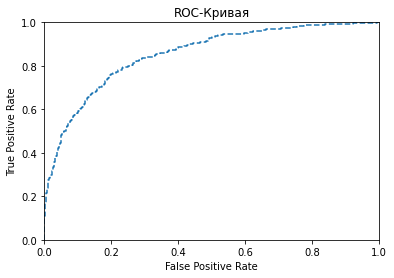

f1-мера модели на тестовой выборке: 0.604989604989605
Площадь под ROC-кривой: 0.8532854823549516
Значение Recall: 0.6879432624113475


In [44]:
model_test = RandomForestClassifier(random_state=12345, max_depth=9, n_estimators=67)
model_test.fit(features_upsampled, target_upsampled)
predictions_test = model_test.predict(features_test)
result = f1_score(target_test, predictions_test)

probabilities = model_test.predict_proba(features_test)

fpr, tpr, thresholds = roc_curve(target_test, probabilities[:, 1])

plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-Кривая')
plt.show()

auc_roc = roc_auc_score(target_test, probabilities[:, 1])

print('f1-мера модели на тестовой выборке:', result)
print('Площадь под ROC-кривой:', auc_roc)
print('Значение Recall:', recall_score(target_test, predictions_test))

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Отличный результат на тестовой выборке. Да, а с ROC-AUC не все так идеально. Интересно бы посмотреть на recall.
</div>


<div class="alert alert-info">
<b> Комментарий студента</b>

Добавил)
</div>

Провел проверку модели "Случайный лес" с подобранными параметрами на тестовой выборке, качество модели выраженное в значении f1-меры 0,60, что больше 0,59 по условию задания. Значение площади под ROC-кривой - AUC-ROC = 0,85, метрика не идеальна, но все же результат лучше, чем у случайной модели. Также провел рассчет полноты, recall=0,69, почти 70% положительных ответов выделяет модель, результат не плохой, но тоже далек от идеала.

In [36]:
predictions_constant = pd.Series([1]*len(target_test))
display(f1_score(target_test, predictions_constant))

0.3491539413949649

Качество модели "Случайный лес", выраженное в f1-мере в 2 раза превышает результат константной модели, то есть выбранная модель лучше предсказывает положительный класс. 

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Я бы добавил сравнение с константной моделью по f1, также можно посмотреть recall и прокомментировать, какую долю клиентов на отток модель верно детектирует.
       
</div>


<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**
    
Спасибо за твой проект! Есть несколько важных моментов, которые необходимо улучшить. Их ты найдешь в разноцветных комментариях.
    
**Отмечу положительные моменты проекта🚀**
    
* Хорошая структура проекта. Выбор моделей, порядок исследования.
* Есть пояснения к шагам, код с высокой читаемостью. 
* Логичность решений.
* Хороший результат на тестовой выборке.
    
**На что стоит обратить внимание🤔**
    
* Необходимо изменить подход к заполнению пропусков.
* Стоит удалить все ненужные колонки (айдишники, порядковые номера).
* Нужно сделать масштабирование.
* Важно изменить разбивку на выборки - валидационную и тестовую лучше сделать одинаковыми по размеру.
* Гиперпараметры моделеям подбираем в каждом случае применения методики борьбы с дисбалансом и в исследовании моделей без учета дисбаланса.
* Необходимо везде оставлять промежуточные выводы и дополнить итоговый вывод.
* Эти и остальные замечания я также написал по ходу проекта.
    
**Желаю удачи и жду твой проект на повторное ревью!**😉
    
    
</div>

<div style="border:solid Chocolate 2px; padding: 40px">

**Комментарий ко второй проверке**

Спасибо за доработку. Критичных комментариев нет. 
    
По энкодингу пояснил, что нужно добавить. Не стоит забывать про дамми-ловушку. Думаю, все достаточно подробно описано в колабе, кажется, там даже два варианта реализации.
    
Не буду держать проект, приму работу.
    
Если остались вопросы, можешь написать в телеграм @kriill

Желаю удачи в дальнейшей учебе!

</div>




## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*